### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

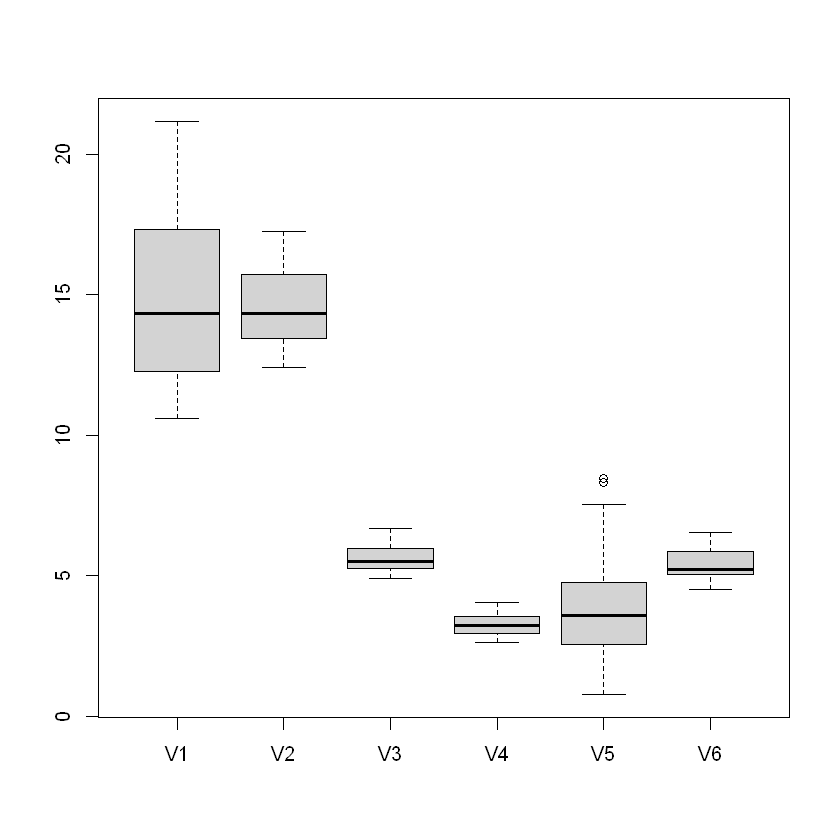

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

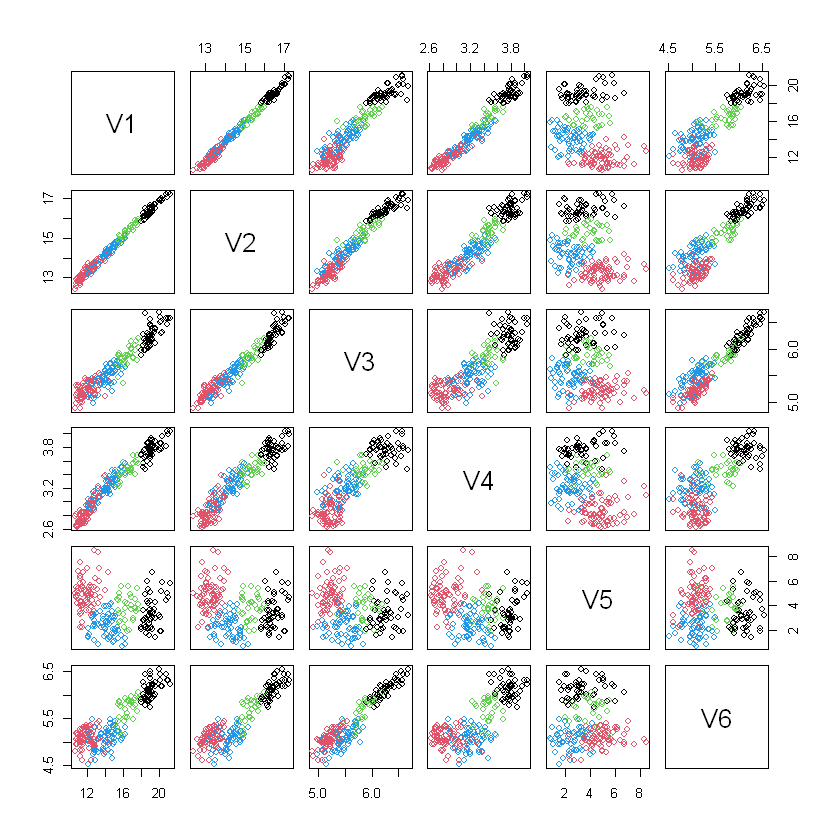

In [2]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

In [3]:
help(princomp)

princomp                 package:stats                 R Documentation

_P_r_i_n_c_i_p_a_l _C_o_m_p_o_n_e_n_t_s _A_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     'princomp' performs a principal components analysis on the given
     numeric data matrix and returns the results as an object of class
     'princomp'.

_U_s_a_g_e:

     princomp(x, ...)
     
     ## S3 method for class 'formula'
     princomp(formula, data = NULL, subset, na.action, ...)
     
     ## Default S3 method:
     princomp(x, cor = FALSE, scores = TRUE, covmat = NULL,
              subset = rep_len(TRUE, nrow(as.matrix(x))), fix_sign = TRUE, ...)
     
     ## S3 method for class 'princomp'
     predict(object, newdata, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula with no response variable, referring only to
          numeric variables.

    data: an optional data frame (or similar: see 'model.frame')
          containing the variables in the formula 'form


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
V1  0.458         0.232         0.378  0.770
V2  0.460                0.231  0.611 -0.597
V3  0.450        -0.291  0.676 -0.496       
V4  0.435         0.638 -0.343 -0.485 -0.213
V5 -0.108 -0.963  0.235                     
V6  0.419 -0.248 -0.627 -0.606              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,3.2304234,-0.2116132,-0.04972335,-0.04857660,0.008226285,0.018955948
2,-2.1449502,-0.6115826,-0.11654550,-0.03565510,0.002483217,0.007844728
3,1.2209796,-0.2371274,0.02424665,-0.03216181,0.006992513,-0.034944879
4,-0.6521064,1.0430904,0.16993814,0.09992983,-0.013396969,-0.006634148


K-means clustering with 4 clusters of sizes 48, 72, 31, 59

Cluster means:
        V1       V2       V3       V4       V5       V6
1 19.15104 16.46917 6.268854 3.772938 3.460417 6.127250
2 11.91861 13.25681 5.225625 2.865319 4.885500 5.087472
3 16.40806 15.31935 5.863968 3.463323 3.850097 5.690452
4 14.10068 14.19559 5.475576 3.212542 2.370051 5.065847

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   1   3   2   4   4   3   4   1   4   2   4   3   3   1   2   2   3   3   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   4   2   2   3   2   4   4   1   4   4   2   4   3   1   1   2   4   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   4   2   1   1   2   2   2   1   2   3   2   4   4   3   4   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   1   2   3   1   4   1   3   3   2   1   4   3   1   

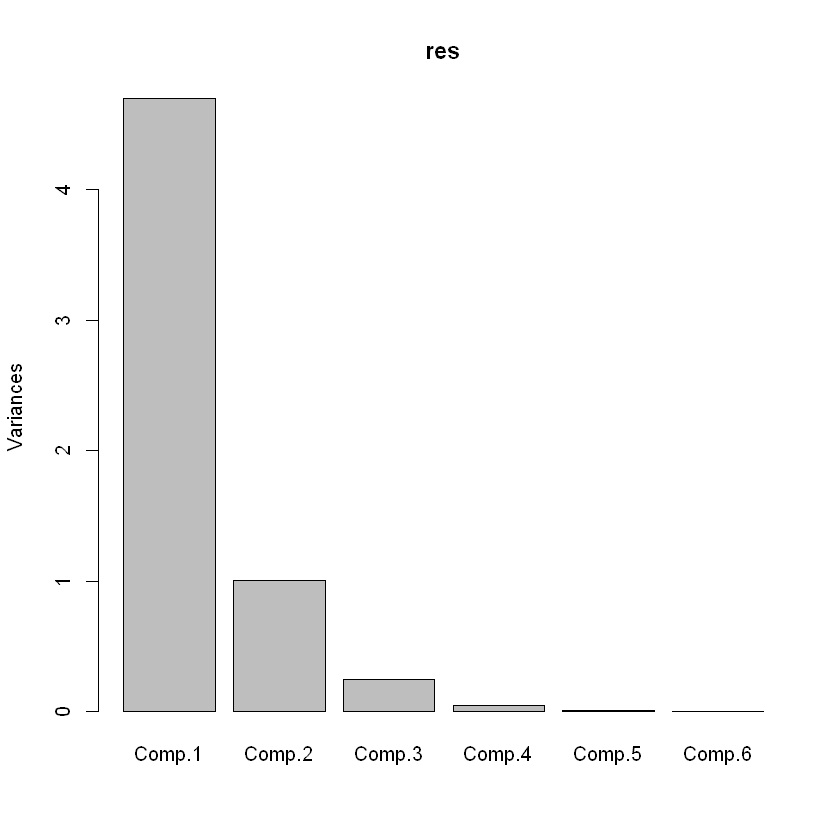

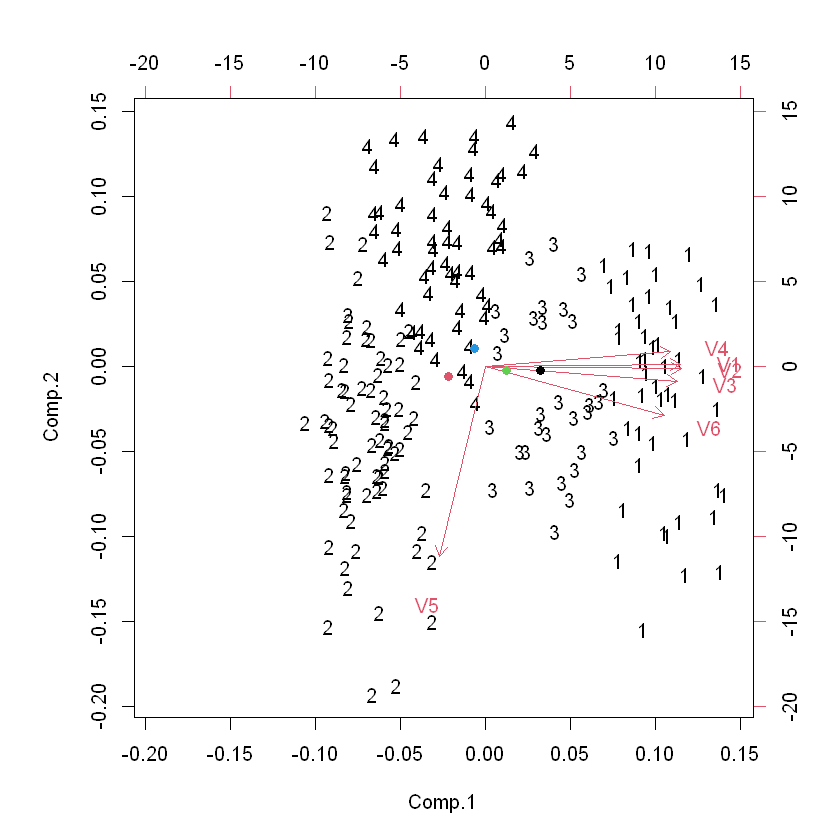

In [4]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res$loadings
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


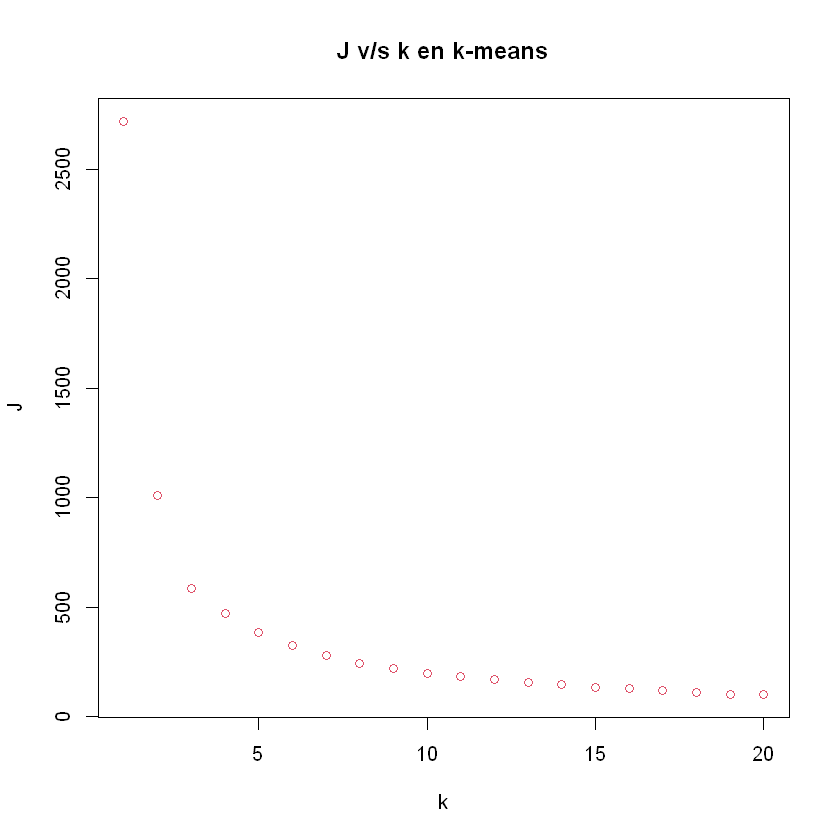

In [5]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.
2. Realice nuevamente los cálculos con el K óptimo y  caracterice los grupos obtenidos. Interprete sus resultados

### Respuesta 1.1
Para encontrar un buen valor para k, se tiene que encontrar un punto codo, en donde la diferencia entre la suma de los cuadrados de las distancias (j) sea menos pronunciada, segun lo visto en clases. Viendo el gráfico, se puede deducir que este k estaria entre el 0 y el 5, pero para confirmar esto se puede hacer lo siguiente:

In [6]:
# Calcular la diferencia con el dato anterior
diferencia <- c(0, diff(J))

# Imprimir la tabla de valores y diferencia
tablaDiferencia <- data.frame(k = 1:fin_iter, J = J, Diferencia = diferencia)
print(tablaDiferencia)

    k         J   Diferencia
1   1 2719.7369     0.000000
2   2 1011.5212 -1708.215630
3   3  587.2468  -424.274467
4   4  470.9324  -116.314406
5   5  385.5104   -85.421957
6   6  323.1987   -62.311743
7   7  277.5356   -45.663028
8   8  240.3369   -37.198756
9   9  217.8772   -22.459723
10 10  197.7465   -20.130614
11 11  182.0318   -15.714767
12 12  169.1788   -12.852961
13 13  157.7912   -11.387633
14 14  146.4337   -11.357462
15 15  134.1976   -12.236080
16 16  126.6372    -7.560433
17 17  117.8037    -8.833521
18 18  111.2178    -6.585939
19 19  102.2156    -9.002113
20 20  100.0858    -2.129800


Viendo la tabla anterior, se puede confirmar que el punto estaría entre el 0 y el 5, mas concretamente, el k sería el 3 (K = 3)

### Respuesta 1.2
1. Podemos visualizar que los grupos estás mucho mas divididos y no suelen tener muchas zonas en conjunto.
2. El agrupamiento de los datos es mucho más preciso.

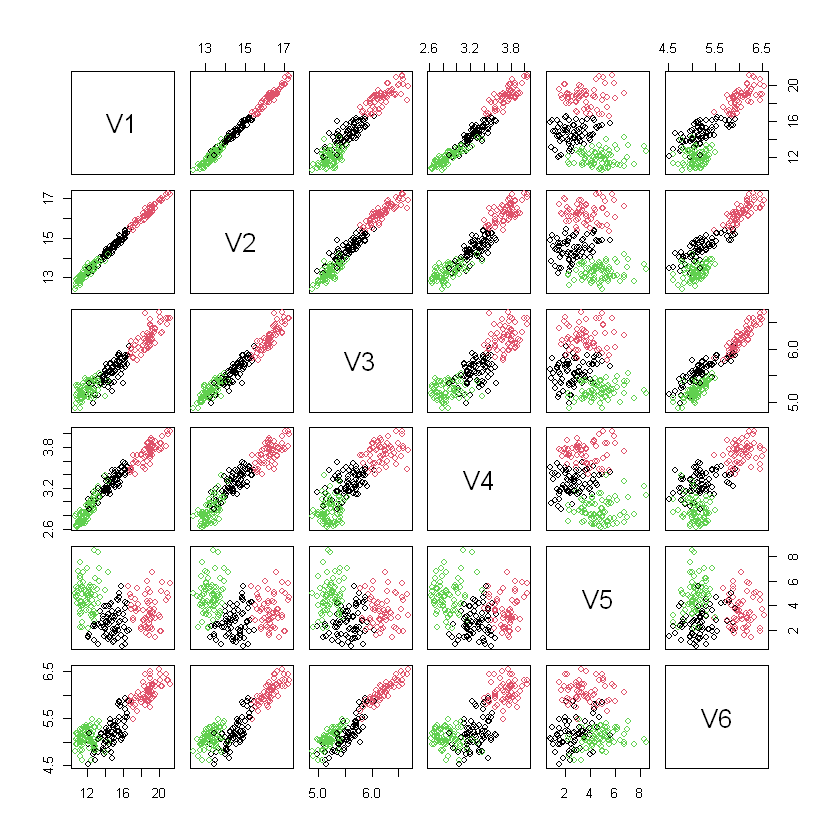

In [ ]:
#ahora desarrollamos con el k apropiado 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
V1  0.458         0.232         0.378  0.770
V2  0.460                0.231  0.611 -0.597
V3  0.450        -0.291  0.676 -0.496       
V4  0.435         0.638 -0.343 -0.485 -0.213
V5 -0.108 -0.963  0.235                     
V6  0.419 -0.248 -0.627 -0.606              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,-0.2189232,0.7985683,0.16423218,0.08015012,-0.010906320,-0.014971476
2,2.9205042,-0.2730151,-0.03930464,-0.04246970,0.010152392,0.007972724
3,-2.1089388,-0.5304285,-0.12243032,-0.04130075,0.002155313,0.007683248


K-means clustering with 3 clusters of sizes 72, 61, 77

Cluster means:
        V1       V2       V3       V4       V5       V6
1 14.64847 14.46042 5.563778 3.277903 2.648931 5.192319
2 18.72180 16.29738 6.208934 3.722672 3.603590 6.066098
3 11.96442 13.27481 5.229286 2.872922 4.759740 5.088519

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   2   1   3   1   1   1   1   2   1   3   1   1   2   2   3   3   1   1   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   2   1   3   3   2   3   1   1   2   1   1   3   1   2   2   2   3   1   3 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  3   3   2   1   3   2   2   3   3   3   2   3   1   3   1   1   2   1   2   3 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   2   3   1   2   1   2   1   2   3   2   1   1   2   1   2   1   2   1   2 
 81  82  83  84  85  86  87  88  89  

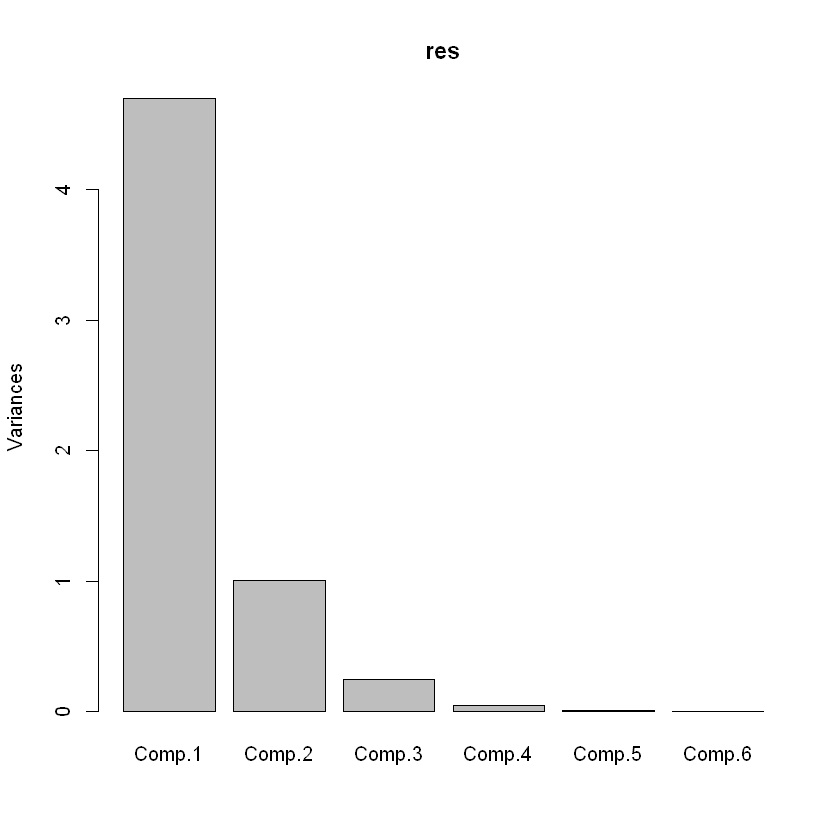

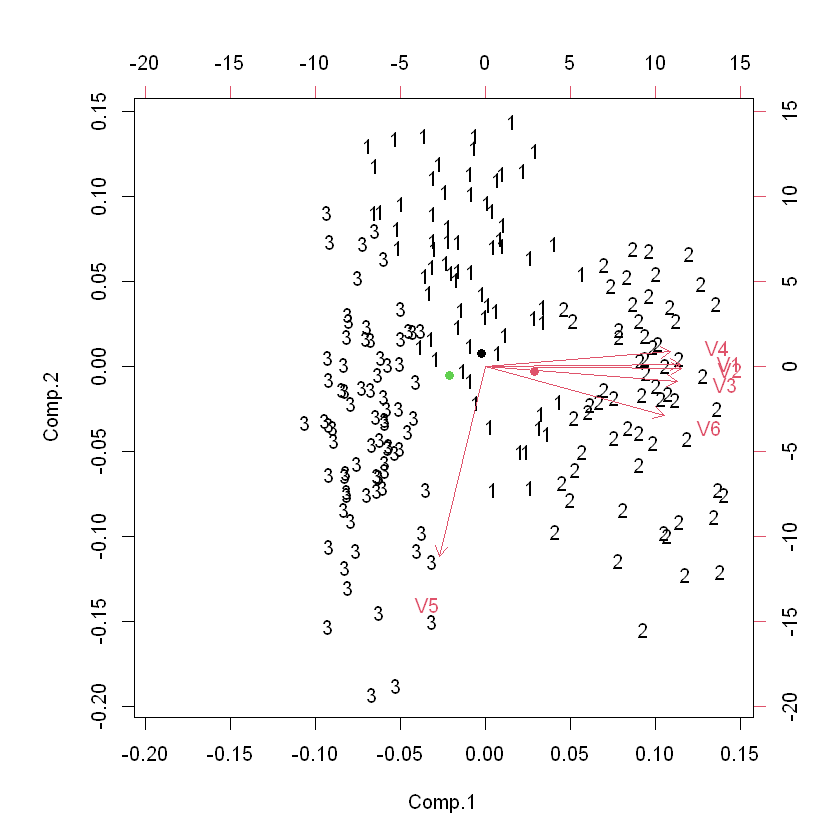

In [8]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res$loadings
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

### Respuesta 1.2
1. Podemos visualizar que los grupos estás mucho mas divididos y no suelen tener muchas zonas en conjunto, como en el grafico con K = 4.
2. En el grupo 3 se ecuentran los valores más pequeños de las variables v1, v2, v3, v4 y v6, mientras que los valores mayores de la variable v5 se encuentran aquí.
3.  En el grupo 1 se ecuentran los valores más grandes de las variables v1, v2, v3, v4 y v6, mientras que los valores medios de la variable v5 se encuentran aquí.
4. En el grupo 2 se encuentran los valores medios de las variables v1, v2, v3, v4 y v6, mientras que los valores menores de la variable v5 se encuentran aquí.

## Otras alternativas de cálculo

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



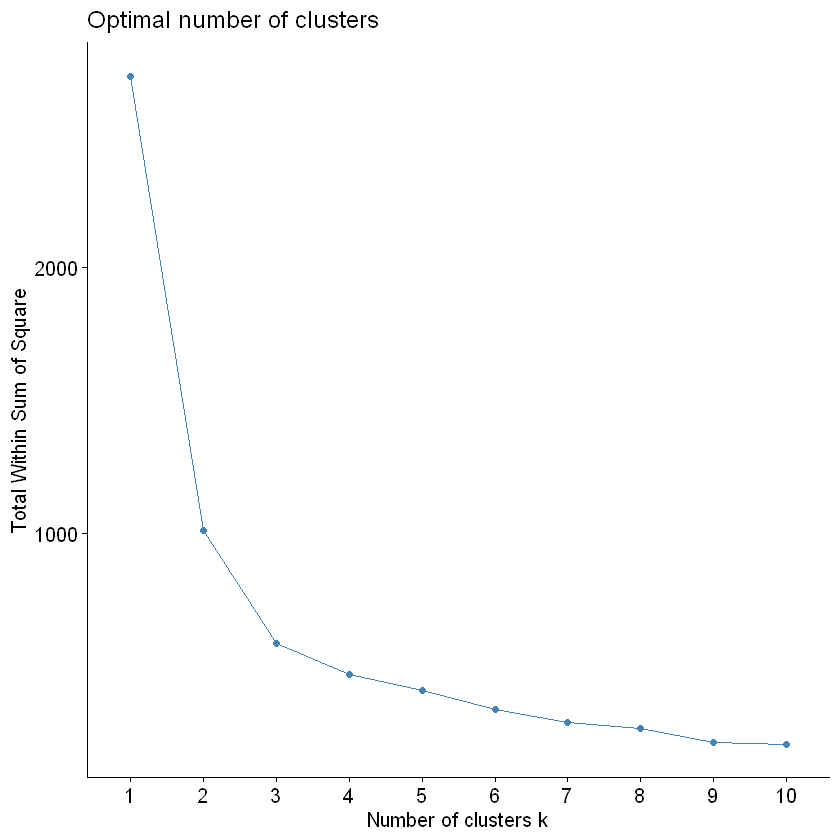

In [9]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


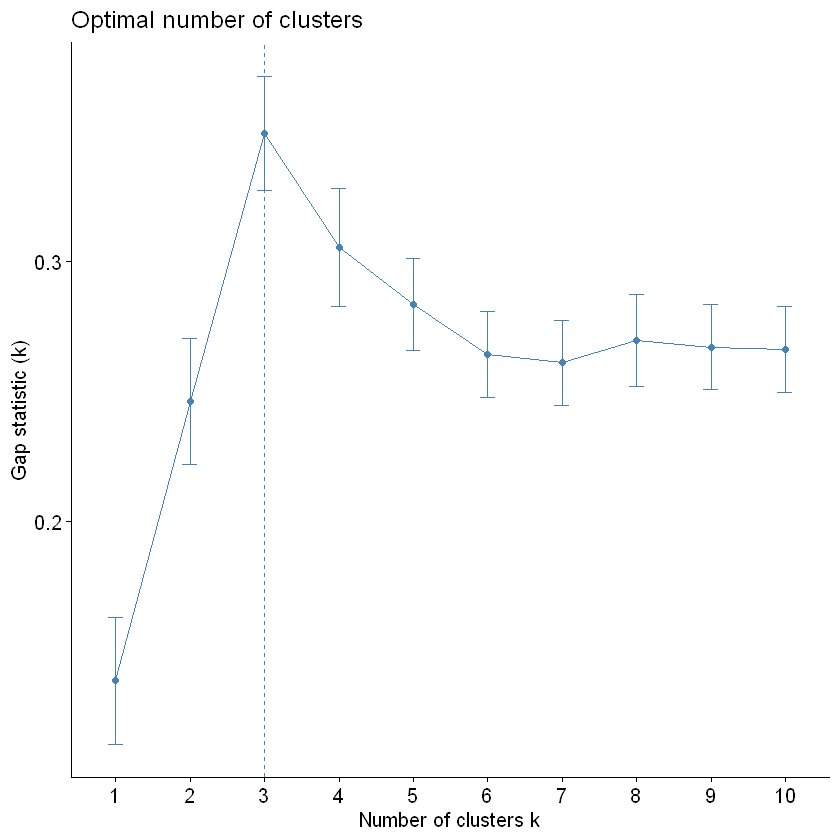

In [10]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

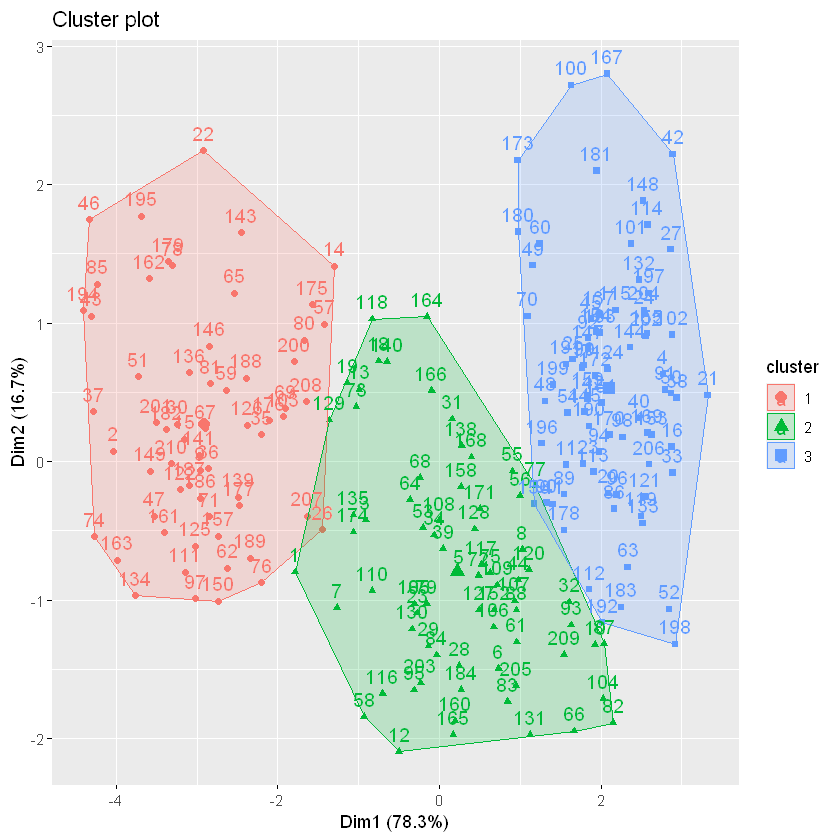

In [11]:
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con las 11 características (correspondiente a las columnas 4 a la 14)  en el archivo tiposMusica.csv. Si es necesario, filtre sus datos considerando las conclusiones del análisis exploratorio de la tarea de PCA.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [12]:
datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")

In [13]:
datosC[1:10,4:14]
datosMusica = datosC[4:14]
summary(datosMusica)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,0.942,0.350,79333,0.0761,0.00e+00,0.1560,-22.003,0.0352,140.044,0.0293
2,13,0.991,0.236,261000,0.0753,3.15e-03,0.0858,-23.232,0.0426,122.973,0.3000
3,2,0.994,0.240,48000,0.2510,9.58e-01,0.1020,-11.310,0.0394,99.234,0.1600
4,32,0.996,0.387,136293,0.0222,9.22e-01,0.1200,-29.504,0.1400,112.360,0.0687
5,29,0.994,0.358,154147,0.2050,1.45e-05,0.1490,-13.588,0.0430,87.696,0.5180
6,25,0.993,0.470,70987,0.2040,9.15e-01,0.1180,-21.667,0.0653,138.257,0.0398
7,0,0.644,0.415,64760,0.0197,0.00e+00,0.1970,-34.225,0.0369,74.338,0.2280
8,0,0.993,0.380,297372,0.0414,9.23e-01,0.1130,-22.443,0.0350,75.241,0.5470
9,23,0.993,0.332,219947,0.2300,8.72e-01,0.1110,-23.125,0.0620,99.962,0.0356


   popularity     acousticness       danceability     duration_ms    
 Min.   : 0.00   Min.   :0.000051   Min.   :0.0685   Min.   : 31787  
 1st Qu.:29.00   1st Qu.:0.175000   1st Qu.:0.2570   1st Qu.:141787  
 Median :41.00   Median :0.816000   Median :0.3770   Median :210960  
 Mean   :38.83   Mean   :0.609778   Mean   :0.3926   Mean   :219232  
 3rd Qu.:53.00   3rd Qu.:0.983000   3rd Qu.:0.5040   3rd Qu.:262773  
 Max.   :74.00   Max.   :0.996000   Max.   :0.8650   Max.   :865940  
     energy        instrumentalness     liveness         loudness      
 Min.   :0.00211   Min.   :0.00000   Min.   :0.0504   Min.   :-46.122  
 1st Qu.:0.07260   1st Qu.:0.00315   1st Qu.:0.0995   1st Qu.:-24.606  
 Median :0.25500   Median :0.47500   Median :0.1150   Median :-14.592  
 Mean   :0.35131   Mean   :0.45033   Mean   :0.1789   Mean   :-17.134  
 3rd Qu.:0.59700   3rd Qu.:0.89300   3rd Qu.:0.1570   3rd Qu.: -9.127  
 Max.   :0.97700   Max.   :0.95800   Max.   :0.9720   Max.   : -0.747  
  spee

### Respuesta 2.1
El subconjunto de datos extraidos de tiposMusica.csv nos entrega 11 columnas que muestran características de distintos tipos de musica. Tambien se puede ver que duration_ms, loudness y tempo estan en escalas distintas al resto que se manejan entre 0 y 1. Además según el grafíco de correlaciones realizado anteriormente en la pregunta 4 de la tarea PCA, se puede agregar que energy y loudness estan fuertemente correlacionadas de manera positiva, acercandose a un valor 1, luego las correlaciones negativas fuertes son entre accousticness y energy con un valor cercano a -1 y también esta acousticness y loudness que muestra una correlación negativa un poco menos fuerte. El resto de las variables no muestran una fuerte relación con otras variables.

Es pertinente realizar clustering si queremos identificar grupos, y como se puede ver podemos agrupar por las características de las canciones, esto se ve con los datos que nos entrega el resumen y además por la existencia de la columna genero, que nos habla de 3 grupos de musica (Clasica, Electronica y Rock).



### Respuesta 2.2

Según el análisis realizado en la respuesta 2.1, se obtiene que un buen número para k podría ser el 3.

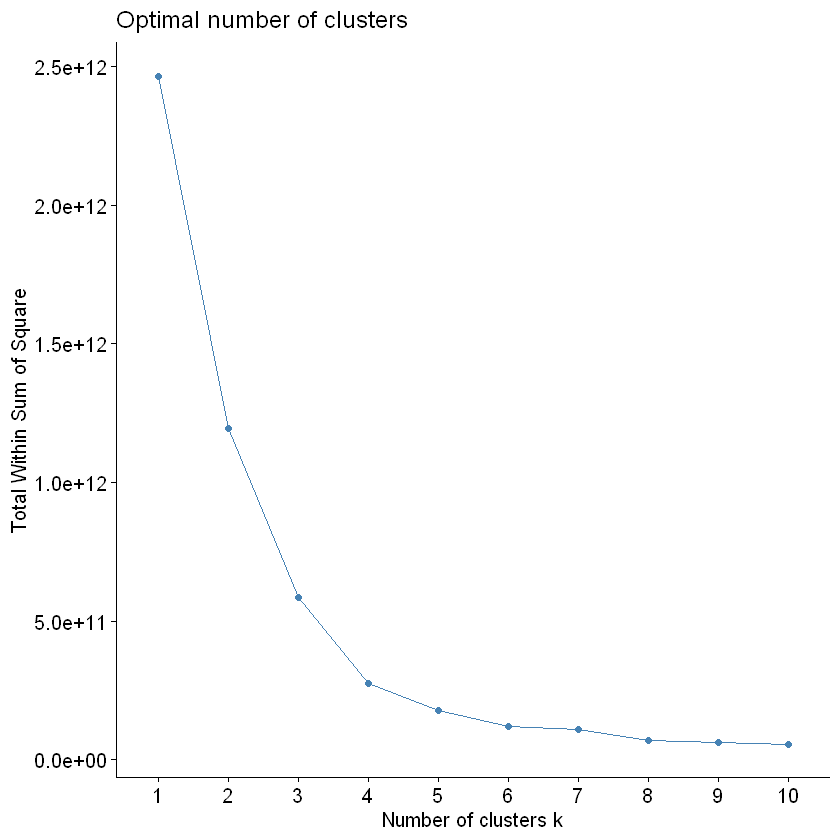

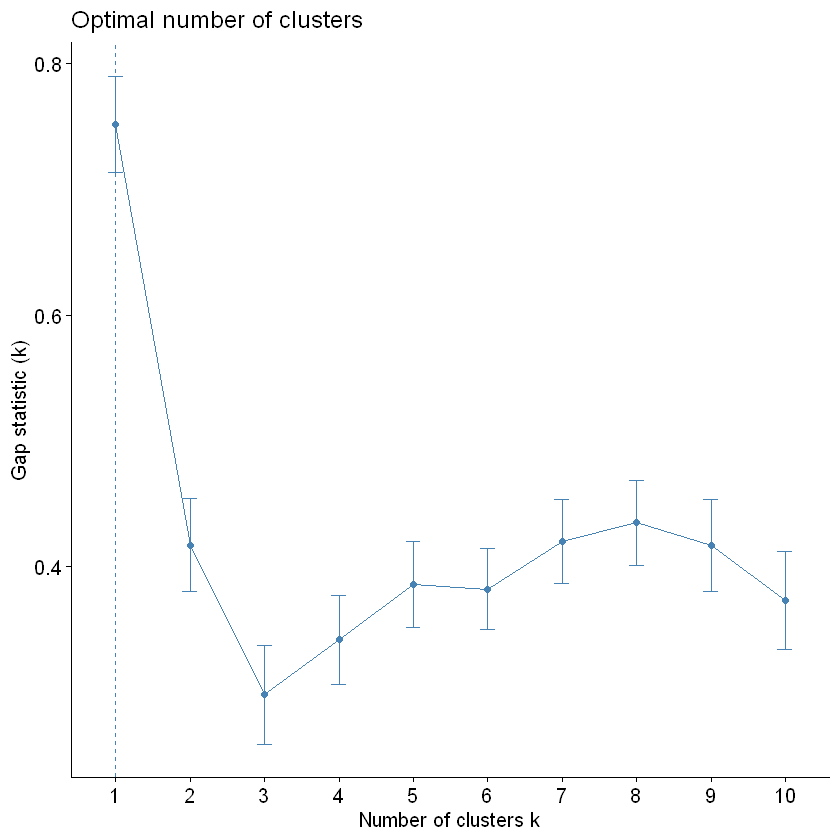

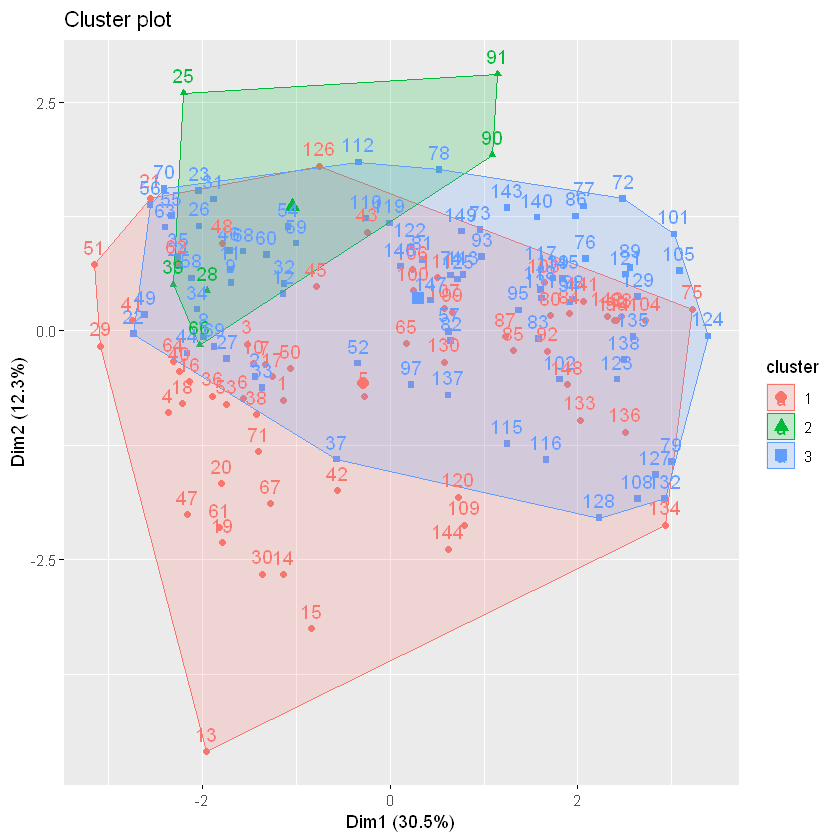

In [14]:
library(cluster)
library(factoextra)
df <- data.frame(datosMusica)

fviz_nbclust(df, kmeans, method = "wss")

gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

# K-means con k = 3
km3 <- kmeans(df, 3,iter.max=1000,nstart=10)
# Visualización para k = 3
fviz_cluster(km3,df)

Como se puede ver los valores de k óptimo obtenidos con los metodos del codo y gap statistic coinciden con el valor k=3 propuesto a partir de los datos en la respuesta 2.1. Se logran apreciar 3 grupos en el gráfico, con varias intersecciones entre los grupos.

### Respuesta 2.3


1. De acuerdo a los grupos generados por kmeans, podemos ver que el grupo 2 tiene pocos elementos y el grupo 3 comparte una gran parte de su area con el grupo 1.

2. mayor grupo 1 -> popularity, danceability, energy, liveness, loudness ----
promedio grupo 1 -> valence, duration_ms ----
   menor grupo 1 -> acousticness, instrumentalness,speechines, tempo

3. mayor grupo 2 -> , instrumentalness, speechines, duration_ms, acousticness ----
   promedio grupo 2 ->  tempo, ----
   menor grupo 2 -> popularity, energy, liveness, loudness, valence,  danceability

4. mayor grupo 3 -> valence, tempo ----
   promedio grupo 3 ->  popularity, acousticness, danceability, energy, liveness, loudness, instrumentalness, speechines ----
   menor grupo 3 -> duration_ms

5. Del resumen de los grupos anterior podemos decir que en el grupo 3, se reunen valores medios de la mayoria de las 11 variables, con un tiempo y valance mayor, pero, con una duración menor. El grupo 2 se caracteriza por canciones con mayor valores en duración, acustica, instrumental y menos populares. el grupo 1 agrupa las canciones más populares, energicas y bailables con una duración promedio. Lo que nos indica que los 3 grupos capturan perfiles musicales distintos.

6. El 76.9% nos indica que el clustring es bastante bueno, ya que explica una gran parte de la variabilidad total en los datos.


Loadings:
                 Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
popularity        0.190  0.228  0.239  0.153  0.629  0.493  0.174  0.324  0.206
acousticness     -0.490        -0.110         0.112               -0.142  0.235
danceability      0.277 -0.176 -0.112  0.563        -0.337 -0.124         0.649
duration_ms              0.387  0.388 -0.203  0.395 -0.574 -0.370 -0.173       
energy            0.489         0.144        -0.241                0.203 -0.238
instrumentalness -0.344  0.147  0.296  0.162 -0.313 -0.112 -0.210  0.713 -0.122
liveness          0.203 -0.127 -0.199 -0.723               -0.287  0.320  0.420
loudness          0.490         0.104        -0.119               -0.175 -0.182
speechiness             -0.406  0.547 -0.238        -0.246  0.611         0.192
tempo                   -0.467  0.495  0.101         0.389 -0.552 -0.252       
valence                 -0.584 -0.254         0.502 -0.272 -0.111  0.300 -0.403
                 Comp.10 Comp

Call:
princomp(x = datosMusica, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
1.8330064 1.1628680 1.0847838 1.0436223 0.9894619 0.9558269 0.8573586 0.7468862 
   Comp.9   Comp.10   Comp.11 
0.7167870 0.4707793 0.3177462 

 11  variables and  149 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
1,-1.2632022,1.4261762,2.395097646,-1.06029761,1.1906306,-2.4388367,-0.81325639,-0.40852973,-0.11500424,-0.23678145,0.10671500
2,-0.2530233,-0.5612466,-0.135534324,0.11927869,-0.4206467,0.3987266,0.17056225,0.07595975,-0.03062678,-0.03072909,0.03588771
3,0.2687416,0.3847040,-0.009633244,-0.04389906,0.2822439,-0.2020235,-0.09791901,-0.04129081,0.03063447,0.03680646,-0.03449452


K-means clustering with 3 clusters of sizes 4, 65, 80

Cluster means:
  popularity acousticness danceability duration_ms    energy instrumentalness
1   33.50000    0.7862500    0.2640000    721935.0 0.2240000        0.8157500
2   34.81538    0.6448506    0.3872154    120044.4 0.3429109        0.4825898
3   42.36250    0.5724581    0.4033150    274685.9 0.3645029        0.4058571
   liveness  loudness speechiness    tempo   valence
1 0.1082500 -22.25375  0.09065000 103.5958 0.2073250
2 0.1771431 -18.61714  0.05913077 110.4832 0.2835538
3 0.1838475 -15.67374  0.04720125  96.8046 0.2636050

Clustering vector:
  [1] 2 3 2 2 2 2 2 3 3 2 3 3 2 2 2 2 2 2 2 2 2 3 3 3 1 3 3 1 2 2 3 3 3 3 3 2 3
 [38] 2 3 2 2 2 2 3 2 3 2 2 3 2 2 3 2 3 3 3 3 3 3 3 2 2 3 2 2 1 2 3 3 3 2 3 3 3
 [75] 2 3 3 3 3 2 3 3 3 2 2 3 2 2 3 3 1 2 2 3 3 2 3 3 2 2 3 3 2 2 3 2 2 3 2 3 2
[112] 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 2 3 3 2 2 3 2 2 3 3 3 2 2 3 2 3 3 3 2
[149] 3

Within cluster sum of squares by cluster:
[1]  6788190843

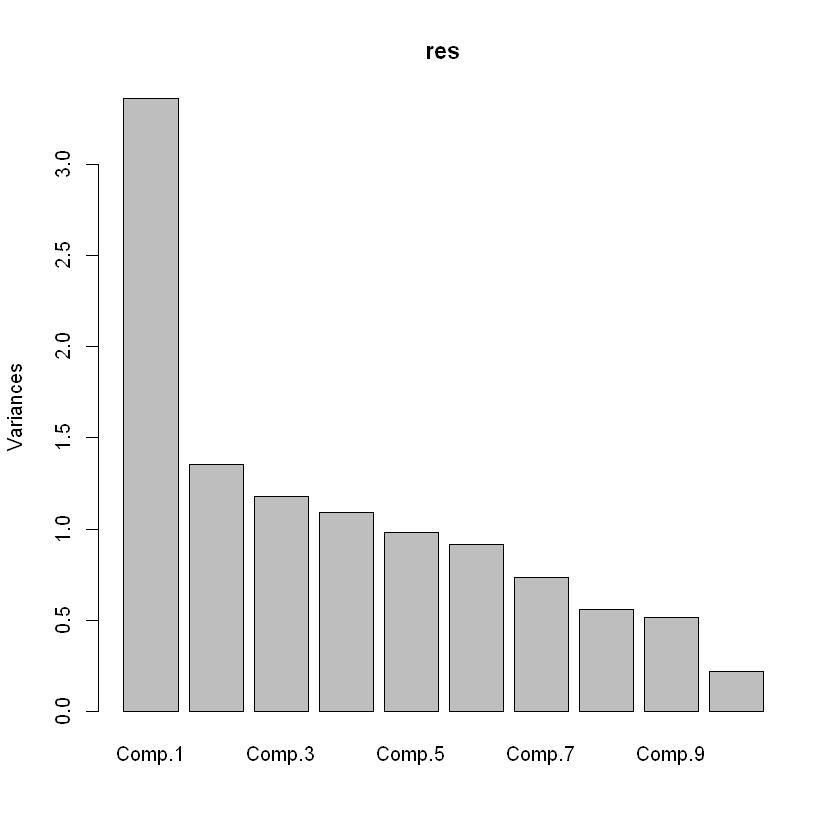

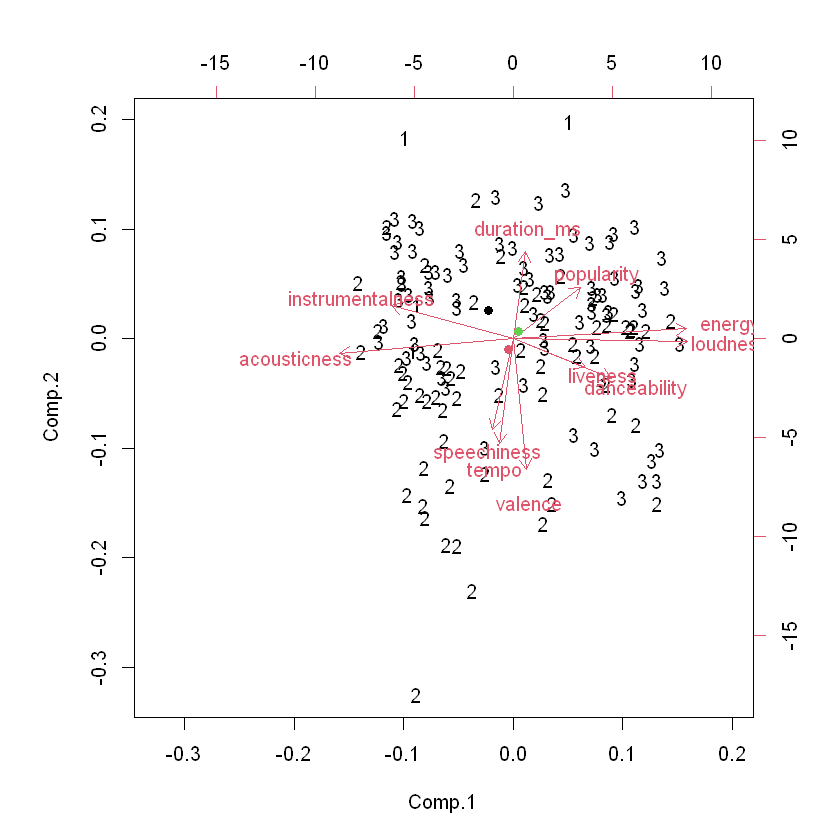

In [32]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datosMusica, cor=TRUE)
res$loadings
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)